In [1]:
import seaborn
import pandas as pd
import geopandas
import pysal
import numpy
import matplotlib.pyplot as plt

In [2]:
mx = geopandas.read_file("data/mexico/mexicojoin.shp")
mx.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


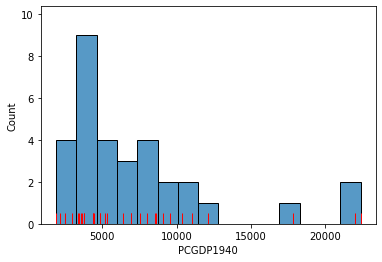

In [7]:
selected = "PCGDP1940"      #"%_manufacturing"
mx[["NAME", selected]]  
# Plot histogram
ax = seaborn.histplot(mx[selected], bins=15)
# Add rug on horizontal axis
seaborn.rugplot(mx[selected], height=0.05, color="red", ax=ax);

In [8]:
mx[selected].describe()

count       32.000000
mean      7230.531250
std       5204.952883
min       1892.000000
25%       3701.750000
50%       5256.000000
75%       8701.750000
max      22361.000000
Name: PCGDP1940, dtype: float64

In [9]:
import mapclassify

In [10]:
ei5 = mapclassify.EqualInterval(mx[selected], k=5)
ei5

EqualInterval               

      Interval         Count
----------------------------
[ 1892.00,  5985.80] |    17
( 5985.80, 10079.60] |     9
(10079.60, 14173.40] |     3
(14173.40, 18267.20] |     1
(18267.20, 22361.00] |     2

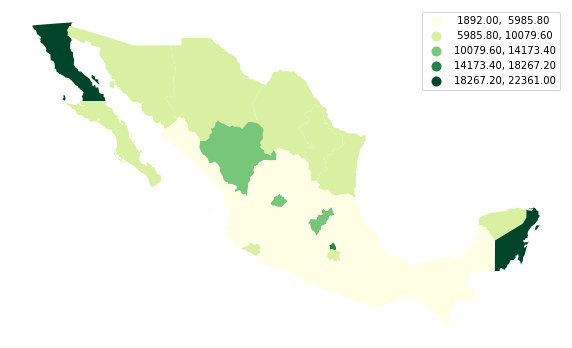

In [11]:
ax = mx.plot(
    figsize=(10,10),
    column=selected,  # Data to plot
    scheme="EqualInterval",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

In [12]:
q5 = mapclassify.Quantiles(mx[selected], k=5)
q5

Quantiles                   

      Interval         Count
----------------------------
[ 1892.00,  3576.20] |     7
( 3576.20,  4582.80] |     6
( 4582.80,  6925.20] |     6
( 6925.20,  9473.00] |     6
( 9473.00, 22361.00] |     7

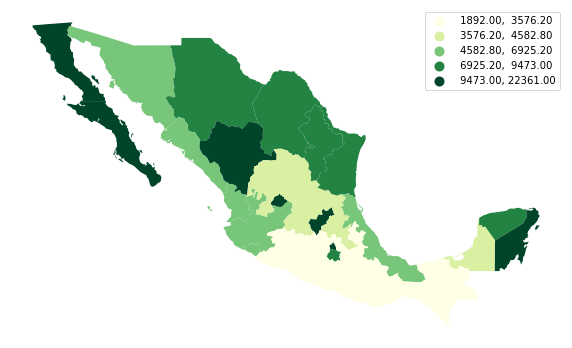

In [13]:
ax = mx.plot(
    figsize=(10,10),
    column=selected,  # Data to plot
    scheme="Quantiles",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

In [14]:
msd = mapclassify.StdMean(mx[selected])
msd

StdMean                     

      Interval         Count
----------------------------
(    -inf, -3179.37] |     0
(-3179.37,  2025.58] |     1
( 2025.58, 12435.48] |    28
(12435.48, 17640.44] |     0
(17640.44, 22361.00] |     3

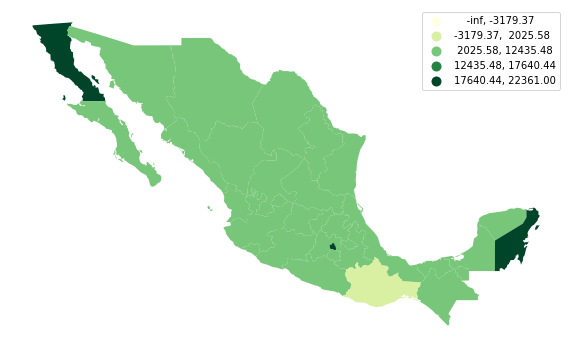

In [15]:
ax = mx.plot(
    figsize=(10,10),    
    column=selected,  # Data to plot
    scheme="StdMean",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

In [16]:
mb5 = mapclassify.MaximumBreaks(mx[selected], k=5)
mb5

MaximumBreaks               

      Interval         Count
----------------------------
[ 1892.00,  5854.00] |    17
( 5854.00, 11574.00] |    11
(11574.00, 14974.00] |     1
(14974.00, 19890.50] |     1
(19890.50, 22361.00] |     2

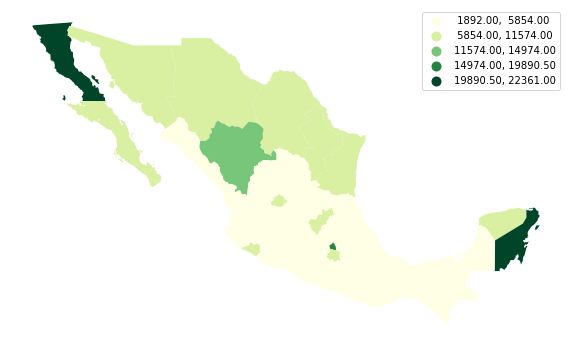

In [17]:
ax = mx.plot(
    figsize=(10,10),    
    column=selected,  # Data to plot
    scheme="MaximumBreaks",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

In [18]:
ht = mapclassify.HeadTailBreaks(mx[selected])
ht

HeadTailBreaks              

      Interval         Count
----------------------------
[ 1892.00,  7230.53] |    20
( 7230.53, 12244.42] |     9
(12244.42, 20714.00] |     1
(20714.00, 22163.00] |     1
(22163.00, 22361.00] |     1

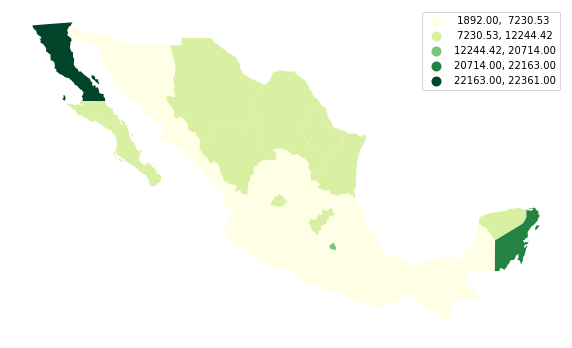

In [19]:
ax = mx.plot(
    figsize=(10,10),
    column=selected,  # Data to plot
    scheme="HeadTailBreaks",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

In [20]:
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(mx[selected], k=5)
jc5

JenksCaspall                

      Interval         Count
----------------------------
[ 1892.00,  2934.00] |     4
( 2934.00,  4414.00] |     9
( 4414.00,  6399.00] |     5
( 6399.00, 12132.00] |    11
(12132.00, 22361.00] |     3

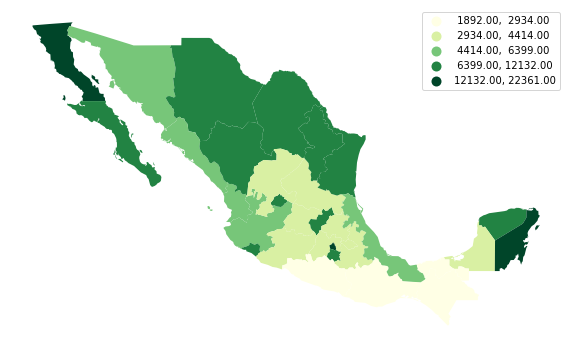

In [21]:
ax = mx.plot(
    figsize=(10,10),
    column=selected,  # Data to plot
    scheme="JenksCaspall",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

In [22]:
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(mx[selected], k=5)
fj5

FisherJenks                 

      Interval         Count
----------------------------
[ 1892.00,  5309.00] |    17
( 5309.00,  9073.00] |     8
( 9073.00, 12132.00] |     4
(12132.00, 17816.00] |     1
(17816.00, 22361.00] |     2

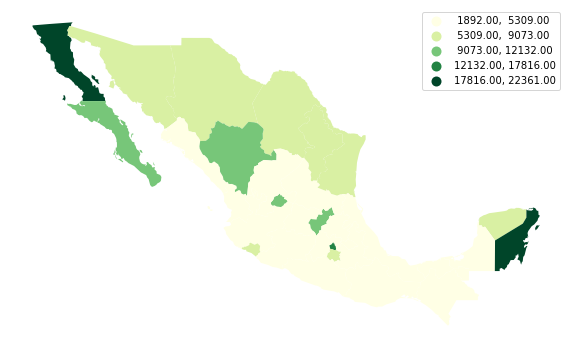

In [23]:
ax = mx.plot(
    figsize=(10,10),
    column=selected,  # Data to plot
    scheme="FisherJenks",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

In [24]:
mp5 = mapclassify.MaxP(mx[selected], k=5)
mp5

MaxP                        

      Interval         Count
----------------------------
[ 1892.00,  3569.00] |     7
( 3569.00,  5309.00] |    10
( 5309.00,  7990.00] |     5
( 7990.00, 10384.00] |     5
(10384.00, 22361.00] |     5

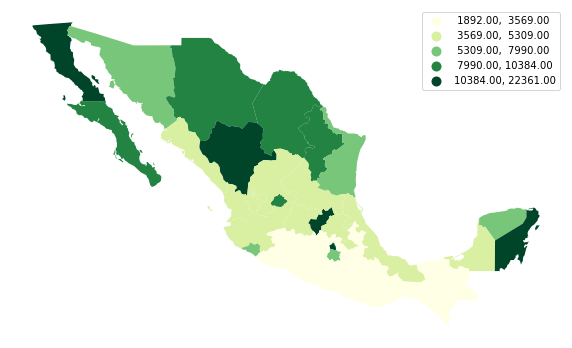

In [25]:
ax = mx.plot(
    figsize=(10,10),
    column=selected,  # Data to plot
    scheme="MaxP",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
)
ax.set_axis_off();

### EqualInterval, Quantiles, StdMean, MaximumBreaks, HeadTailBreaks, JenksCaspall, FisherJenks, MaxP

### Computing the Sume of Absolute Deviations about Class Medians (ADCM)

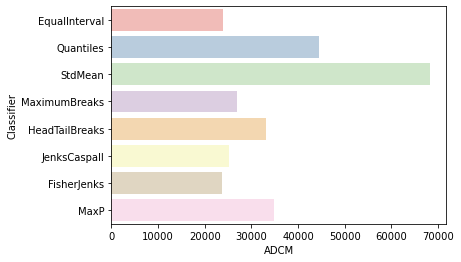

In [27]:
# Bunch classifier objects
class5 = ei5, q5, msd, mb5, ht, jc5, fj5, mp5
# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)